In [ ]:
from google.colab import drive
import tensorflow as tf

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Directories
train_folder = '/content/drive/MyDrive/Welding_Dataset/training'
test_folder = '/content/drive/MyDrive/Welding_Dataset/testing'
validation_folder = '/content/drive/MyDrive/Welding_Dataset/validation'

# Image properties
img_size = (28, 28)  # Target size for resizing
batch_size = 32

# Use TensorFlow's image_dataset_from_directory to load data
def load_datasets(train_folder, test_folder, validation_folder, img_size, batch_size):
    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        train_folder,
        labels='inferred',  # Infer labels based on subdirectory names
        label_mode='categorical',  # One-hot encoded labels
        batch_size=batch_size,
        image_size=img_size,  # Rescale images to this size
        shuffle=True
    )

    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        validation_folder,
        labels='inferred',
        label_mode='categorical',
        batch_size=batch_size,
        image_size=img_size,
        shuffle=True
    )

    test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        test_folder,
        labels='inferred',
        label_mode='categorical',
        batch_size=batch_size,
        image_size=img_size,
        shuffle=False  # No need to shuffle for testing
    )

    return train_dataset, validation_dataset, test_dataset

# Load datasets
train_dataset, validation_dataset, test_dataset = load_datasets(train_folder, test_folder, validation_folder, img_size, batch_size)

class_names = train_dataset.class_names


# Prefetch data for optimal performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)



Mounted at /content/drive
Found 15863 files belonging to 4 classes.
Found 6101 files belonging to 4 classes.
Found 2443 files belonging to 4 classes.


Epoch 1/11
496/496 [==============================] - 2866s 6s/step - loss: 1.3135 - accuracy: 0.5614 - val_loss: 0.7964 - val_accuracy: 0.6694
Epoch 2/11
496/496 [==============================] - 99s 197ms/step - loss: 0.6371 - accuracy: 0.7654 - val_loss: 0.4716 - val_accuracy: 0.8476
Epoch 3/11
496/496 [==============================] - 93s 185ms/step - loss: 0.4648 - accuracy: 0.8273 - val_loss: 0.3884 - val_accuracy: 0.8643
Epoch 4/11
496/496 [==============================] - 102s 203ms/step - loss: 0.3836 - accuracy: 0.8599 - val_loss: 0.3249 - val_accuracy: 0.8944
Epoch 5/11
496/496 [==============================] - 98s 196ms/step - loss: 0.3170 - accuracy: 0.8873 - val_loss: 0.3717 - val_accuracy: 0.8676
Epoch 6/11
496/496 [==============================] - 101s 200ms/step - loss: 0.2662 - accuracy: 0.9057 - val_loss: 0.3024 - val_accuracy: 0.9010
Epoch 7/11
496/496 [==============================] - 112s 223ms/step - loss: 0.2292 - accuracy: 0.9198 - val_loss: 0.5378 - val_

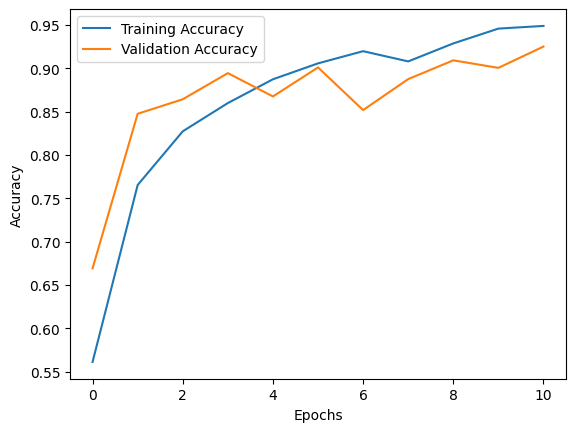

77/77 [==============================] - 333s 4s/step - loss: 0.1229 - accuracy: 0.9562
Final Test Accuracy: 0.96


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Function to build the CNN model
def build_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Training parameters
epochs = 11
num_classes = len(class_names)
input_shape = (*img_size, 3)

# Initialize the model
model = build_model(input_shape, num_classes)

# Train the model using the training dataset and validate with the validation dataset
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs)

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test the final model on the test set
final_loss, final_acc = model.evaluate(test_dataset)
print(f"Final Test Accuracy: {final_acc:.2f}")

model.save('/content/drive/MyDrive/Welding_Dataset/PWDDM.keras')


